# 1. Description

Data yang akan dianalisis merupakan data untuk memprediksi suatu buah apakah apel, pisang atau mangga berdasarkan beberapa variabel yaitu tinggi, berat dan massa serta color score.

<img src="../src/flow.png"/>

# 2. Read dataset

In [1]:
import pandas as pd

In [2]:
df = pd.read_table('../input/fruit_data_with_colors.txt')

In [3]:
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
"""
Karena variabel fruit_subtype bertipe kategori, maka kita perlu melakukan transformasi ke dalam bentuk skala nominal/ordinal.
"""
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df['fruit_subtype_label'] = label_encoder.fit_transform(df['fruit_subtype'])
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score,fruit_subtype_label
0,1,apple,granny_smith,192,8.4,7.3,0.55,3
1,1,apple,granny_smith,180,8.0,6.8,0.59,3
2,1,apple,granny_smith,176,7.4,7.2,0.60,3
3,2,mandarin,mandarin,86,6.2,4.7,0.80,4
4,2,mandarin,mandarin,84,6.0,4.6,0.79,4


# 3. EDA (Exploratory Data Analysis)
Tahap ini bertujuan untuk mengetahui
1. Data Quality (missing values, tipe data)
2. Statistical Test (distribusi, korelasi/asosiasi)

## 3.1 Tipe data

In [5]:
"""
Berdasarkan informasi di bawah ini, dapat dikatakan bahwa kita mempunyai 1 variabel dependen yaitu fruit_name,
sedangkan variabel lainnya (selain variabel fruit_label) adalah variabel independen. Kita perlu mengubah kolom 
fruit_subtype menjadi numberik.
"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   fruit_label          59 non-null     int64  
 1   fruit_name           59 non-null     object 
 2   fruit_subtype        59 non-null     object 
 3   mass                 59 non-null     int64  
 4   width                59 non-null     float64
 5   height               59 non-null     float64
 6   color_score          59 non-null     float64
 7   fruit_subtype_label  59 non-null     int32  
dtypes: float64(3), int32(1), int64(2), object(2)
memory usage: 3.6+ KB


## 3.2 Missing Values

In [6]:
"""
Berdasarkan informasi di bawah ini, tidak terdapat variabel yang missing.
"""
df.isnull().sum()

fruit_label            0
fruit_name             0
fruit_subtype          0
mass                   0
width                  0
height                 0
color_score            0
fruit_subtype_label    0
dtype: int64

In [7]:
"""
Semakin tinggi nilai korelasi, semakin kuat juga hubungan antara dua variabel tersebut. Berdasarkan nilai korelasi
di bawah ini, dapat dikatakan bahwa hubungan yang kuat diantara
    1. height vs fruit_label (0.508766)
    2. width vs mass (0.877687)
    3. height vs mass (0.609571)
    4. fruit_label vs fruit_subtype_label (0.899933)
"""
dfCor = df.corr()
dfCor

,fruit_label,mass,width,height,color_score,fruit_subtype_label
fruit_label,1.000000,0.032738,-0.298090,0.508766,-0.310521,0.899933
mass,0.032738,1.000000,0.877687,0.609571,-0.079794,-0.006291
width,-0.298090,0.877687,1.000000,0.396848,-0.076576,-0.255842
height,0.508766,0.609571,0.396848,1.000000,-0.247047,0.337473
color_score,-0.310521,-0.079794,-0.076576,-0.247047,1.000000,-0.421738
fruit_subtype_label,0.899933,-0.006291,-0.255842,0.337473,-0.421738,1.000000


## 3.3 Statistika Descriptive

In [21]:
"""
Ukuran pemusatan data dapat dilihat dari nilai mean, median atau modus. Sedangkan ukuran penyebaran data
dapat dilihat dari standard deviasi, Q1,Q2 dan Q3
"""
df[['mass','width','height','color_score']].describe()

,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000
mean,163.118644,7.105085,7.693220,0.762881
std,55.018832,0.816938,1.361017,0.076857
min,76.000000,5.800000,4.000000,0.550000
25%,140.000000,6.600000,7.200000,0.720000
50%,158.000000,7.200000,7.600000,0.750000
75%,177.000000,7.500000,8.200000,0.810000
max,362.000000,9.600000,10.500000,0.930000


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='mass', ylabel='Count'>

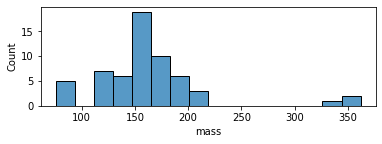

In [43]:
plt.subplot(2, 1, 1)
sns.histplot(df.mass)

<AxesSubplot:xlabel='mass', ylabel='Count'>

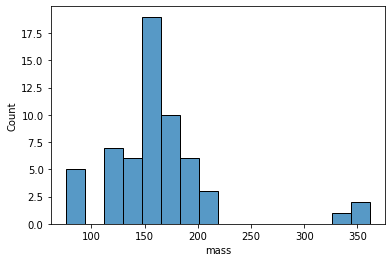

In [32]:
"""
Berdasarkan histogram di bawah ini, dapat dilihat bahwa distribusi variabel mass menjulur ke kanan, artinya
berat buah lebih banyak yang kurang dari rata-rata berat umum.
"""
sns.histplot(df.mass)

<AxesSubplot:xlabel='width', ylabel='Count'>

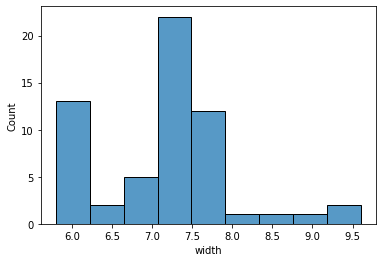

In [34]:
"""
Berdasarkan histogram di bawah ini, dapat dilihat bahwa distribusi variabel width menjulur ke kanan, artinya
lebar buah lebih banyak yang kurang dari rata-rata berat umum.
"""
sns.histplot(df.width)

<AxesSubplot:xlabel='height', ylabel='Count'>

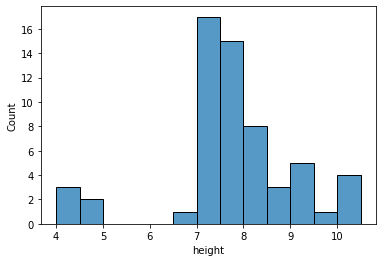

In [46]:
"""
Berdasarkan histogram di bawah ini, dapat dilihat bahwa distribusi variabel height menjulur ke kiri, artinya
tinggi buah lebih banyak yang lebih dari rata-rata tinggi umum.
"""
sns.histplot(df.height)

<AxesSubplot:xlabel='mass'>

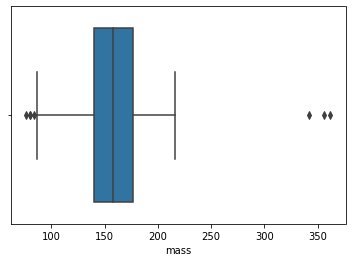

In [50]:
"""
variabel mass memiliki outlier
"""
sns.boxplot(x = "mass", data = df)

<AxesSubplot:xlabel='width'>

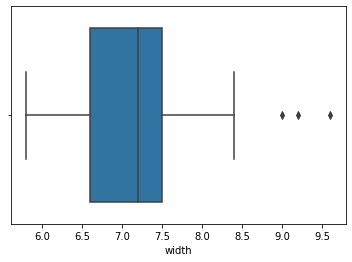

In [48]:
"""
variabel width memiliki outlier
"""
sns.boxplot(x = "width", data = df)

<AxesSubplot:xlabel='height'>

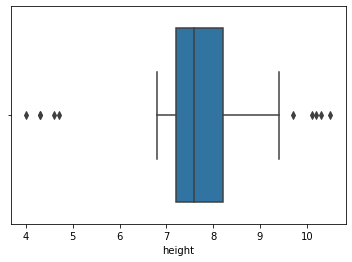

In [49]:
"""
variabel height memiliki outlier
"""
sns.boxplot(x = "height", data = df)

# 3.4 Pandas Profiling
Kita bisa menggunakan Pandas Profiling yang merupakan package python untuk melihat 
    1. Overview of the dataset
    2. Variable properties
    3. Interaction of variables
    4. Correlation of variables
    5. Missing values
    6. Sample data

In [8]:
from pandas_profiling import ProfileReport

In [52]:
profile = ProfileReport(df,explorative=True)

In [10]:
profile.to_file('../output/profile.html')

# 4. Split dataset into training dan testing dataset

In [70]:
X = df[['mass','width','height','color_score']]
y = df['fruit_label']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

# 5. Imbalanced Test

In [68]:
from imblearn.over_sampling import SMOTE

In [94]:
os_data_X,os_data_y=os.fit_sample(X_train, y_train)

In [101]:
# Jenis buah
set(os_data_y['fruit_label'])

{1, 2, 3, 4}

In [105]:
"""
Berdasarkan proporsi tiap kategori, bisa dikatakan bahwa dataset bersifat balance.
"""

os = SMOTE(random_state=0,k_neighbors=2)
columns = X_train.columns

os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['fruit_label'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Proportion of 1 data in oversampled data is ",len(os_data_y[os_data_y['fruit_label']==1])/len(os_data_X))
print("Proportion of 2 data in oversampled data is ",len(os_data_y[os_data_y['fruit_label']==2])/len(os_data_X))
print("Proportion of 3 data in oversampled data is ",len(os_data_y[os_data_y['fruit_label']==3])/len(os_data_X))
print("Proportion of 4 data in oversampled data is ",len(os_data_y[os_data_y['fruit_label']==4])/len(os_data_X))

length of oversampled data is  60
Proportion of 1 data in oversampled data is  0.25
Proportion of 2 data in oversampled data is  0.25
Proportion of 3 data in oversampled data is  0.25
Proportion of 4 data in oversampled data is  0.25


# 6. Feature Selection
Feature selection berguna untuk memilih variabel-variabel penting dalam pemodelan. Sehingga variabel-variabel yang tidak penting tidak digunakan dalam pemodelan. Beberapa manfaat yang bisa didapatkan yaitu
1. Reduce Overfitting
2. Improve Accuracy
3. Reduce Training Time

## 6.1 Recursive Feature Elimination

In [62]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier

In [67]:
rfe = RFE(estimator=DecisionTreeClassifier())
fit = rfe.fit(X_train,y_train) 
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

Num Features: 2
Selected Features: [ True False False  True]
Feature Ranking: [1 3 2 1]


## 6.2  Feature Importance

In [54]:
from sklearn.ensemble import ExtraTreesClassifier

In [55]:
X = df[['mass','width','height','color_score']]
y = df['fruit_label']

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [56]:
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X_train, y_train)
print(model.feature_importances_)

[0.21990701 0.246359   0.24727468 0.28645931]


# 7. Modelling

In [66]:
"""
Kasus ini termasuk dalam masalah KLASIFIKASI (data berlabel) sehingga lebih sesuai menggunakan supervised learning.
Beberapa algoritma yang bisa digunakan adalah
    1. Regresi Logistik
    2. Decision Tree
    3. Random Forest
    4. k-NN

Dalam kasus ini, dipilih algoritma k-NN (sebagai pembelajaran)
"""
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score,fruit_subtype_label
0,1,apple,granny_smith,192,8.4,7.3,0.55,3
1,1,apple,granny_smith,180,8.0,6.8,0.59,3
2,1,apple,granny_smith,176,7.4,7.2,0.60,3
3,2,mandarin,mandarin,86,6.2,4.7,0.80,4
4,2,mandarin,mandarin,84,6.0,4.6,0.79,4


## 7.1 Contruct Model

In [133]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)

## 7.2 Model Evaluation

In [136]:
"""
Berdasarkan metrik Akurasi, dapat dikatakan bahwa model mampu menjelaskan keragaman data sebanyak 50%, sedangkan sisanya
dijelaskan oleh variabel lain dan error.
"""
y_pred = knn.predict(X_test)
print('Accuracy of kNN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of kNN classifier on test set: 0.50


In [137]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[3 0 0 1]
 [0 2 0 0]
 [4 0 3 2]
 [1 0 1 1]]


In [138]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.38      0.75      0.50         4
           2       1.00      1.00      1.00         2
           3       0.75      0.33      0.46         9
           4       0.25      0.33      0.29         3

    accuracy                           0.50        18
   macro avg       0.59      0.60      0.56        18
weighted avg       0.61      0.50      0.50        18



## 7.3 Model Prediction

In [139]:
X_train.head()

,mass,width,height,color_score
14,152,7.6,7.3,0.69
32,164,7.2,7.0,0.80
49,132,5.8,8.7,0.73
29,160,7.0,7.4,0.81
37,154,7.3,7.3,0.79


In [140]:
knn.predict([X_train.values.tolist()[0]])

array([1], dtype=int64)

In [141]:
knn.predict([[152,7.6,7.3,0.69]])

array([1], dtype=int64)

# Refference
1. https://towardsdatascience.com/4-libraries-that-can-perform-eda-in-one-line-of-python-code-b13938a06ae
2. https://scikit-learn.org/stable/modules/feature_selection.html
3. https://machinelearningmastery.com/feature-selection-machine-learning-python/